Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [148]:
##modulos necesarios
import pandas as pd
import numpy as np
import zipfile
import shutil
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
import glob

##haciendo un unzip para extraer los archivos
archivo_zip = zipfile.ZipFile('precios.zip', 'r')
archivo_zip.extractall('precios')
archivo_zip.close()
filenames = !ls precios/*.xls*

##leer los archivos y saltar lineas hasta detectar el campo fecha
def leer_archivos (filename):
    for k in range(10):
        df = pd.read_excel(filename, skiprows = k, usecols = list(range(25)))
        if df.iloc[0,0] == "Fecha":
            df = pd.read_excel(filename, skiprows = k+1, usecols = list(range(25)))
            break
    return(df)

##lista de archivos encontrados
arhivos_juntos = []
for filename in filenames:
    arhivos_juntos.append(leer_archivos(filename))
arhivos_juntos= pd.concat(arhivos_juntos, sort=True)
arhivos_juntos.size

##pivote punto 1
arhivos_juntos_melt = pd.melt(arhivos_juntos,id_vars="Fecha")
arhivos_juntos_melt.columns = ['Fecha','Hora','Precio']




**2.--** Compute e imprima el número de registros con datos faltantes.

In [150]:
arhivos_juntos_melt.isnull().sum().sum()

454

**3.--** Compute e imprima el número de registros duplicados.

In [151]:
arhivos_juntos_melt.duplicated().sum()

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [152]:
len(arhivos_juntos_melt)-arhivos_juntos_melt.duplicated().sum()

199865

**5.--** Compute y grafique el precio primedio diario.

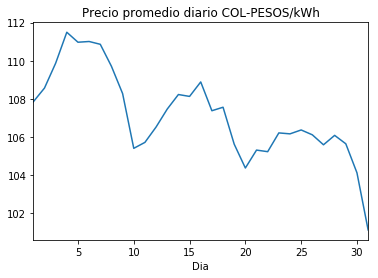

In [153]:
##se convierten los campos al formato adecuado para operarlos
arhivos_juntos_melt["Precio"] = pd.to_numeric(arhivos_juntos_melt["Precio"])
arhivos_juntos_melt["Fecha"] = pd.to_datetime(arhivos_juntos_melt["Fecha"])
arhivos_juntos_melt["Hora"] = pd.to_numeric(arhivos_juntos_melt["Hora"])

##Tabla con campo de día 
arhivos_juntos_melt['Dia'] = arhivos_juntos_melt['Fecha'].dt.day
##promedio dia
precio_prom_dia = (arhivos_juntos_melt.groupby("Dia")["Precio"].mean())
precio_prom_dia.plot(title="Precio promedio diario COL-PESOS/kWh");

**6.--** Compute y grafique el precio máximo por mes.

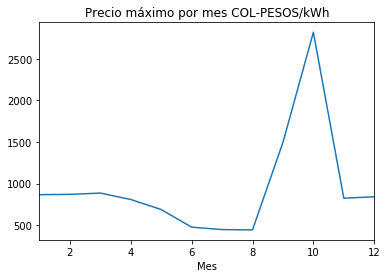

In [154]:
##Tabla con campo de mes 
arhivos_juntos_melt["Mes"] = arhivos_juntos_melt["Fecha"].dt.month
precio_max_mes = (arhivos_juntos_melt.groupby("Mes")["Precio"].max())
##grafico de precio maximo mes
precio_max_mes.plot(title="Precio máximo por mes COL-PESOS/kWh");

**7.--** Compute y grafique el precio mínimo mensual.

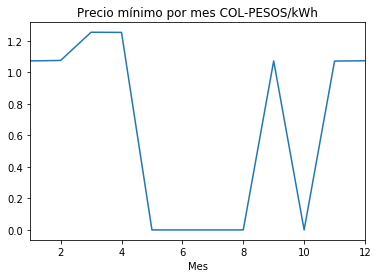

In [155]:
##acrupar por precio minimo de mes 
precio_min_mes = (arhivos_juntos_melt.groupby("Mes")["Precio"].min())
##grafico de precio maximo mes
precio_min_mes.plot(title="Precio mínimo por mes COL-PESOS/kWh");

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

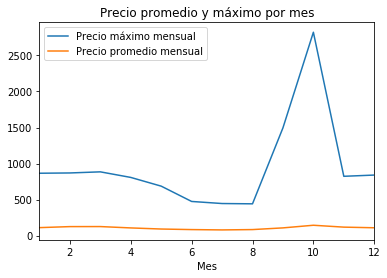

In [156]:
## diccionario con  valores como lista requerida
dicti = {"Precio": ['max', 'mean']}
#agrupamiento por los valores del diccionaro
group_by_max_mean = arhivos_juntos_melt.groupby("Mes").agg(dicti)
#graficos
plot_group = group_by_max_mean.plot(title="Precio promedio y máximo por mes")
plot_group.legend(["Precio máximo mensual", "Precio promedio mensual"]);

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

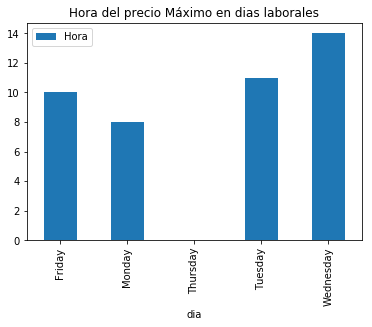

In [157]:

#columna nueva con el nombre del dia
arhivos_juntos_melt["dia"] = arhivos_juntos_melt["Fecha"].dt.weekday_name
#se seleccionan las columnas reueridas
hora_precio_max_dia = arhivos_juntos_melt[['dia','Hora','Precio']]
# se filtra con la agrupacion del precio maximo por dia
grupo_dia = hora_precio_max_dia.loc[hora_precio_max_dia.groupby('dia')['Precio'].idxmax()]
#se dejan los dias laborales
filtro_dia_semana = grupo_dia[(grupo_dia['dia']!='Saturday') & 
           (grupo_dia['dia']!='Sunday')]
filtro_dia_semana
#se crea el grafico
filtro_dia_semana.plot(x= "dia", y = "Hora", title="Hora del precio Máximo en dias laborales", kind = "bar");

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

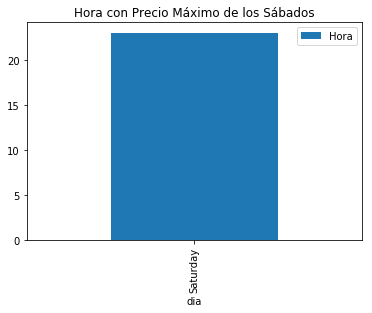

In [158]:

# Usamos las listas construidos en el punto anterior
#se filtra para saba y se usa la misma linea del punto anterior
grupo_dia_sabado = hora_precio_max_dia.loc[hora_precio_max_dia.groupby('dia')['Precio'].idxmax()]
filtro_dia_sabado = grupo_dia_sabado[(grupo_dia_sabado['dia']=='Saturday')]

# Creamos gráfico con el nombre del día en el eje x y la hora en el eje y
filtro_dia_sabado.plot(x= "dia", y = "Hora", title="Hora con Precio Máximo de los Sábados", kind = "bar");

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

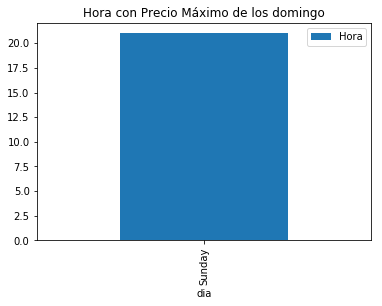

In [159]:
# Usamos las listas construidos en el punto anterior
#se filtra para saba y se usa la misma linea del punto anterior
grupo_dia_domingo = hora_precio_max_dia.loc[hora_precio_max_dia.groupby('dia')['Precio'].idxmax()]
filtro_dia_domingo = grupo_dia_domingo[(grupo_dia_domingo['dia']=='Sunday')]

# Creamos gráfico con el nombre del día en el eje x y la hora en el eje y
filtro_dia_domingo.plot(x= "dia", y = "Hora", title="Hora con Precio Máximo de los domingo", kind = "bar");

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [160]:

#se crea la columna de año
arhivos_juntos_melt
arhivos_juntos_melt["Ano"] = arhivos_juntos_melt["Fecha"].dt.year
tabla = arhivos_juntos_melt.loc[arhivos_juntos_melt.groupby("Ano")["Precio"].idxmin()][['Ano','Fecha','Precio']]
tabla=tabla.reset_index(drop=True)
tabla


,Ano,Fecha,Precio
0,1995.0,1995-07-28,0.000000
1,1996.0,1996-06-30,0.000000
2,1997.0,1997-07-15,10.882310
3,1998.0,1998-07-12,13.847330
4,1999.0,1999-03-28,18.359530
5,2000.0,2000-03-25,21.531167
6,2001.0,2001-08-20,24.822879
7,2002.0,2002-04-29,26.777682
8,2003.0,2003-02-14,37.013438
9,2004.0,2004-03-29,32.252998


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

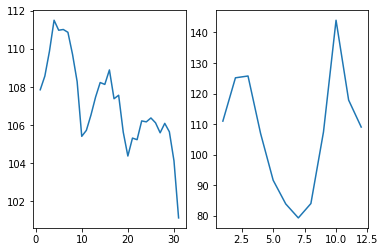

In [182]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
precio_prom_dia_ = (arhivos_juntos_melt.groupby("dia")["Precio"].mean())
precio_prom_mes = (arhivos_juntos_melt.groupby("Mes")["Precio"].mean())

outer_grid = gridspec.GridSpec(1,2)
ax1 = plt.subplot(outer_grid[0,0])
ax2 = plt.subplot(outer_grid[0,1])
ax1.plot(precio_prom_dia)
ax2.plot(precio_prom_mes)

In [183]:
shutil.rmtree('precios')

---